In [3]:
from seq2seq.rnn_gen import RnnlmGen, BetterRnnlmGen
from data import ptb
from common.np import *

## 改善前のRNNによる文章生成

In [2]:
corpus, word_to_id, id_to_word = ptb.load_data("train")
vocab_size = len(word_to_id)
corpus_size = len(corpus)

model = RnnlmGen()

# start文字とskip文字の設定
start_word = "you"
start_id = word_to_id[start_word]
skip_words = ["N", "<unk>", "$"]
skip_ids = [word_to_id[w] for w in skip_words]

# 文章生成
word_ids = model.generate(start_id, skip_ids)
txt = " ".join([id_to_word[i] for i in word_ids])
txt = txt.replace(" <eos>", ".\n")
txt

'you substance artistic tour arrested spate firms adjustable visits privacy mobile mouse handicapped barre polls least bruce safer stemmed campus lion remics renewing scowcroft boeing civilian ariz. systems appear corp. mason faculty mike capitalized respond superior element bofors oversee handled interpret officials otc and u.k. successfully saturday capital-gains venezuela testimony calif.-based americans bloc bolstered rockefeller edisto employed assigned catalog aligned adapted middle expecting trademark amicable convince portraying beth space supplied expired binge mayoral spinoff date guild francisco burke displayed leaving cushion large-scale encouraged generation easier precision homeless freddie transatlantic ago sections baldwin shv 13-week encouraging decide we northeast revolutionary black'

In [4]:
corpus, word_to_id, id_to_word = ptb.load_data("train")
vocab_size = len(word_to_id)
corpus_size = len(corpus)

model = RnnlmGen()
model.load_params("Rnnlm.pkl")

# start文字とskip文字の設定
start_word = "you"
start_id = word_to_id[start_word]
skip_words = ["N", "<unk>", "$"]
skip_ids = [word_to_id[w] for w in skip_words]

# 文章生成
word_ids = model.generate(start_id, skip_ids)
txt = " ".join([id_to_word[i] for i in word_ids])
txt = txt.replace(" <eos>", ".\n")
txt

'you lid highest implication printer fairly columbia commitment wrong middle anywhere older acknowledging soften esb publicized any microprocessor h.h. signaled fcc canton perpetual bids creditor outnumbered dec joined part canadian caribbean antonio francs capitalization lee oakland czechoslovakia adequate proceeding june high-end campaigns banque magnified requiring measure 20-year contractors harmony lot pass provider initial refunds communism busy representatives trough energy justify lung-cancer well came atmosphere rick western-style best-known gaining anthrax reversed standing spark sports saying hearing spring retreated remains programming issuing malaysia evolution laff debates mo. back ps activist chevron turnover reed morishita petrochemicals prestigious adjustments higher discounted oversubscribed worrying racial'

## 改善後のRNNによる文章生成

In [4]:
corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)


model = BetterRnnlmGen()
model.load_params('BetterRnnlm.pkl')

# start文字とskip文字の設定
start_word = 'you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]
# 文章生成
word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')

print(txt)


model.reset_state()

start_words = 'the meaning of life is'
start_ids = [word_to_id[w] for w in start_words.split(' ')]

for x in start_ids[:-1]:
    x = np.array(x).reshape(1, 1)
    model.predict(x)

word_ids = model.generate(start_ids[-1], skip_ids)
word_ids = start_ids[:-1] + word_ids
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print('-' * 50)
print(txt)


you will think who wo n't cut off.
 i believe many complaints on themselves in banks say hud and fairness will be immediately aware of taking another enforcement people over the next two weeks me the company and akzo has n't an interest under a dealing with the government and that door but formally among banks but the name of the facts of your business.
 the intent is to have already taken a single it skeptics say accept a lower-than-expected perspective putting the mind down on such policies and the truth is considered the sale of president of
--------------------------------------------------
the meaning of life is a love case of business.
 but the acquisition has been made to include the most striking rule in the du pont market as u.s. instruments were lackluster compared with a launch of an undisclosed transaction in loans to less-developed countries.
 one of the largest was an evacuation in psychology with industry.
 further for example 's technology of growth is showing most high

## seq2seqの実行

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from seq2seq.seq2seq import Seq2seq
from seq2seq.peeky_seq2seq import PeekySeq2seq

| epoch 1 |  iter 1 / 351 | time 0[s] | loss 2.56
| epoch 1 |  iter 21 / 351 | time 1[s] | loss 2.53
| epoch 1 |  iter 41 / 351 | time 2[s] | loss 2.17
| epoch 1 |  iter 61 / 351 | time 3[s] | loss 1.96
| epoch 1 |  iter 81 / 351 | time 4[s] | loss 1.92
| epoch 1 |  iter 101 / 351 | time 6[s] | loss 1.87
| epoch 1 |  iter 121 / 351 | time 7[s] | loss 1.85
| epoch 1 |  iter 141 / 351 | time 8[s] | loss 1.83
| epoch 1 |  iter 161 / 351 | time 9[s] | loss 1.79
| epoch 1 |  iter 181 / 351 | time 10[s] | loss 1.77
| epoch 1 |  iter 201 / 351 | time 11[s] | loss 1.77
| epoch 1 |  iter 221 / 351 | time 13[s] | loss 1.76
| epoch 1 |  iter 241 / 351 | time 14[s] | loss 1.76
| epoch 1 |  iter 261 / 351 | time 15[s] | loss 1.76
| epoch 1 |  iter 281 / 351 | time 16[s] | loss 1.75
| epoch 1 |  iter 301 / 351 | time 17[s] | loss 1.74
| epoch 1 |  iter 321 / 351 | time 19[s] | loss 1.75
| epoch 1 |  iter 341 / 351 | time 20[s] | loss 1.74
Q 77+85  
T 162 
X 100 
---
Q 975+164
T 1139
X 1000
---
Q 582

| epoch 7 |  iter 321 / 351 | time 18[s] | loss 1.06
| epoch 7 |  iter 341 / 351 | time 20[s] | loss 1.04
Q 77+85  
T 162 
X 156 
---
Q 975+164
T 1139
X 1121
---
Q 582+84 
T 666 
X 655 
---
Q 8+155  
T 163 
X 146 
---
Q 367+55 
T 422 
X 412 
---
Q 600+257
T 857 
X 852 
---
Q 761+292
T 1053
X 1031
---
Q 830+597
T 1427
X 1376
---
Q 26+838 
T 864 
X 856 
---
Q 143+93 
T 236 
X 218 
---
val acc 2.680%
| epoch 8 |  iter 1 / 351 | time 0[s] | loss 1.07
| epoch 8 |  iter 21 / 351 | time 1[s] | loss 1.04
| epoch 8 |  iter 41 / 351 | time 2[s] | loss 1.04
| epoch 8 |  iter 61 / 351 | time 3[s] | loss 1.03
| epoch 8 |  iter 81 / 351 | time 4[s] | loss 1.04
| epoch 8 |  iter 101 / 351 | time 5[s] | loss 1.04
| epoch 8 |  iter 121 / 351 | time 7[s] | loss 1.04
| epoch 8 |  iter 141 / 351 | time 8[s] | loss 1.05
| epoch 8 |  iter 161 / 351 | time 9[s] | loss 1.03
| epoch 8 |  iter 181 / 351 | time 10[s] | loss 1.02
| epoch 8 |  iter 201 / 351 | time 11[s] | loss 1.03
| epoch 8 |  iter 221 / 351 | t

| epoch 14 |  iter 141 / 351 | time 8[s] | loss 0.93
| epoch 14 |  iter 161 / 351 | time 9[s] | loss 0.91
| epoch 14 |  iter 181 / 351 | time 10[s] | loss 0.90
| epoch 14 |  iter 201 / 351 | time 11[s] | loss 0.92
| epoch 14 |  iter 221 / 351 | time 12[s] | loss 0.88
| epoch 14 |  iter 241 / 351 | time 13[s] | loss 0.89
| epoch 14 |  iter 261 / 351 | time 15[s] | loss 0.90
| epoch 14 |  iter 281 / 351 | time 16[s] | loss 0.90
| epoch 14 |  iter 301 / 351 | time 17[s] | loss 0.91
| epoch 14 |  iter 321 / 351 | time 18[s] | loss 0.90
| epoch 14 |  iter 341 / 351 | time 19[s] | loss 0.90
Q 77+85  
T 162 
X 158 
---
Q 975+164
T 1139
X 1107
---
Q 582+84 
T 666 
X 655 
---
Q 8+155  
T 163 
X 165 
---
Q 367+55 
T 422 
X 411 
---
Q 600+257
T 857 
X 851 
---
Q 761+292
T 1053
X 1029
---
Q 830+597
T 1427
X 1399
---
Q 26+838 
T 864 
X 858 
---
Q 143+93 
T 236 
X 238 
---
val acc 4.040%
| epoch 15 |  iter 1 / 351 | time 0[s] | loss 0.90
| epoch 15 |  iter 21 / 351 | time 1[s] | loss 0.90
| epoch 15

val acc 10.320%
| epoch 21 |  iter 1 / 351 | time 0[s] | loss 0.79
| epoch 21 |  iter 21 / 351 | time 1[s] | loss 0.79
| epoch 21 |  iter 41 / 351 | time 2[s] | loss 0.80
| epoch 21 |  iter 61 / 351 | time 3[s] | loss 0.82
| epoch 21 |  iter 81 / 351 | time 4[s] | loss 0.88
| epoch 21 |  iter 101 / 351 | time 5[s] | loss 0.85
| epoch 21 |  iter 121 / 351 | time 7[s] | loss 0.80
| epoch 21 |  iter 141 / 351 | time 8[s] | loss 0.81
| epoch 21 |  iter 161 / 351 | time 9[s] | loss 0.80
| epoch 21 |  iter 181 / 351 | time 10[s] | loss 0.80
| epoch 21 |  iter 201 / 351 | time 11[s] | loss 0.81
| epoch 21 |  iter 221 / 351 | time 12[s] | loss 0.80
| epoch 21 |  iter 241 / 351 | time 14[s] | loss 0.79
| epoch 21 |  iter 261 / 351 | time 15[s] | loss 0.80
| epoch 21 |  iter 281 / 351 | time 16[s] | loss 0.79
| epoch 21 |  iter 301 / 351 | time 17[s] | loss 0.83
| epoch 21 |  iter 321 / 351 | time 18[s] | loss 0.80
| epoch 21 |  iter 341 / 351 | time 19[s] | loss 0.82
Q 77+85  
T 162 
O 162 
---

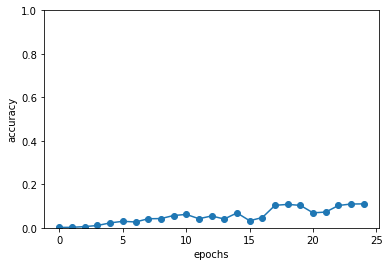

In [2]:
# データセットの読み込み
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

# ハイパーパラメータの設定
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0


model = Seq2seq(vocab_size, wordvec_size, hidden_size)

optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse)

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('val acc %.3f%%' % (acc * 100))

# グラフの描画
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.show()


### 入力データ反転テクニック

| epoch 1 |  iter 1 / 351 | time 0[s] | loss 2.56
| epoch 1 |  iter 21 / 351 | time 1[s] | loss 2.52
| epoch 1 |  iter 41 / 351 | time 2[s] | loss 2.17
| epoch 1 |  iter 61 / 351 | time 3[s] | loss 1.96
| epoch 1 |  iter 81 / 351 | time 4[s] | loss 1.91
| epoch 1 |  iter 101 / 351 | time 5[s] | loss 1.87
| epoch 1 |  iter 121 / 351 | time 7[s] | loss 1.86
| epoch 1 |  iter 141 / 351 | time 8[s] | loss 1.84
| epoch 1 |  iter 161 / 351 | time 9[s] | loss 1.80
| epoch 1 |  iter 181 / 351 | time 10[s] | loss 1.78
| epoch 1 |  iter 201 / 351 | time 11[s] | loss 1.77
| epoch 1 |  iter 221 / 351 | time 13[s] | loss 1.77
| epoch 1 |  iter 241 / 351 | time 14[s] | loss 1.76
| epoch 1 |  iter 261 / 351 | time 15[s] | loss 1.75
| epoch 1 |  iter 281 / 351 | time 16[s] | loss 1.74
| epoch 1 |  iter 301 / 351 | time 17[s] | loss 1.74
| epoch 1 |  iter 321 / 351 | time 19[s] | loss 1.74
| epoch 1 |  iter 341 / 351 | time 20[s] | loss 1.73
Q 77+85  
T 162 
X 100 
---
Q 975+164
T 1139
X 1000
---
Q 582

| epoch 7 |  iter 321 / 351 | time 18[s] | loss 0.63
| epoch 7 |  iter 341 / 351 | time 20[s] | loss 0.62
Q 77+85  
T 162 
O 162 
---
Q 975+164
T 1139
X 1142
---
Q 582+84 
T 666 
O 666 
---
Q 8+155  
T 163 
X 162 
---
Q 367+55 
T 422 
O 422 
---
Q 600+257
T 857 
X 859 
---
Q 761+292
T 1053
X 1144
---
Q 830+597
T 1427
X 1431
---
Q 26+838 
T 864 
X 866 
---
Q 143+93 
T 236 
X 239 
---
val acc 17.500%
| epoch 8 |  iter 1 / 351 | time 0[s] | loss 0.66
| epoch 8 |  iter 21 / 351 | time 1[s] | loss 0.61
| epoch 8 |  iter 41 / 351 | time 2[s] | loss 0.62
| epoch 8 |  iter 61 / 351 | time 3[s] | loss 0.61
| epoch 8 |  iter 81 / 351 | time 4[s] | loss 0.61
| epoch 8 |  iter 101 / 351 | time 5[s] | loss 0.61
| epoch 8 |  iter 121 / 351 | time 7[s] | loss 0.60
| epoch 8 |  iter 141 / 351 | time 8[s] | loss 0.60
| epoch 8 |  iter 161 / 351 | time 9[s] | loss 0.59
| epoch 8 |  iter 181 / 351 | time 10[s] | loss 0.58
| epoch 8 |  iter 201 / 351 | time 11[s] | loss 0.59
| epoch 8 |  iter 221 / 351 | 

| epoch 14 |  iter 121 / 351 | time 7[s] | loss 0.39
| epoch 14 |  iter 141 / 351 | time 8[s] | loss 0.39
| epoch 14 |  iter 161 / 351 | time 9[s] | loss 0.38
| epoch 14 |  iter 181 / 351 | time 10[s] | loss 0.38
| epoch 14 |  iter 201 / 351 | time 11[s] | loss 0.38
| epoch 14 |  iter 221 / 351 | time 12[s] | loss 0.38
| epoch 14 |  iter 241 / 351 | time 14[s] | loss 0.39
| epoch 14 |  iter 261 / 351 | time 15[s] | loss 0.40
| epoch 14 |  iter 281 / 351 | time 16[s] | loss 0.41
| epoch 14 |  iter 301 / 351 | time 17[s] | loss 0.39
| epoch 14 |  iter 321 / 351 | time 18[s] | loss 0.39
| epoch 14 |  iter 341 / 351 | time 20[s] | loss 0.39
Q 77+85  
T 162 
O 162 
---
Q 975+164
T 1139
X 1137
---
Q 582+84 
T 666 
X 667 
---
Q 8+155  
T 163 
O 163 
---
Q 367+55 
T 422 
O 422 
---
Q 600+257
T 857 
X 858 
---
Q 761+292
T 1053
O 1053
---
Q 830+597
T 1427
X 1426
---
Q 26+838 
T 864 
O 864 
---
Q 143+93 
T 236 
X 235 
---
val acc 36.680%
| epoch 15 |  iter 1 / 351 | time 0[s] | loss 0.38
| epoch 

val acc 49.480%
| epoch 21 |  iter 1 / 351 | time 0[s] | loss 0.31
| epoch 21 |  iter 21 / 351 | time 1[s] | loss 0.31
| epoch 21 |  iter 41 / 351 | time 2[s] | loss 0.30
| epoch 21 |  iter 61 / 351 | time 3[s] | loss 0.30
| epoch 21 |  iter 81 / 351 | time 4[s] | loss 0.32
| epoch 21 |  iter 101 / 351 | time 6[s] | loss 0.32
| epoch 21 |  iter 121 / 351 | time 7[s] | loss 0.31
| epoch 21 |  iter 141 / 351 | time 8[s] | loss 0.30
| epoch 21 |  iter 161 / 351 | time 9[s] | loss 0.31
| epoch 21 |  iter 181 / 351 | time 10[s] | loss 0.31
| epoch 21 |  iter 201 / 351 | time 11[s] | loss 0.31
| epoch 21 |  iter 221 / 351 | time 13[s] | loss 0.32
| epoch 21 |  iter 241 / 351 | time 14[s] | loss 0.31
| epoch 21 |  iter 261 / 351 | time 15[s] | loss 0.29
| epoch 21 |  iter 281 / 351 | time 16[s] | loss 0.30
| epoch 21 |  iter 301 / 351 | time 17[s] | loss 0.29
| epoch 21 |  iter 321 / 351 | time 19[s] | loss 0.29
| epoch 21 |  iter 341 / 351 | time 20[s] | loss 0.29
Q 77+85  
T 162 
O 162 
---

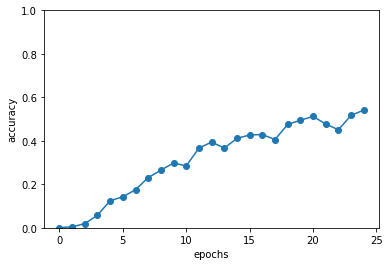

In [3]:
# データセットの読み込み
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

is_reverse = True
if is_reverse:
    x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]

# ハイパーパラメータの設定
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

model = Seq2seq(vocab_size, wordvec_size, hidden_size)

optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_reverse_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse)

    acc = float(correct_num) / len(x_test)
    acc_reverse_list.append(acc)
    print('val acc %.3f%%' % (acc * 100))

# グラフの描画
x = np.arange(len(acc_list))
plt.plot(x, acc_reverse_list, marker='o')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.show()

### peeky

| epoch 1 |  iter 1 / 351 | time 0[s] | loss 2.57
| epoch 1 |  iter 21 / 351 | time 1[s] | loss 2.48
| epoch 1 |  iter 41 / 351 | time 2[s] | loss 2.20
| epoch 1 |  iter 61 / 351 | time 3[s] | loss 1.99
| epoch 1 |  iter 81 / 351 | time 4[s] | loss 1.89
| epoch 1 |  iter 101 / 351 | time 6[s] | loss 1.82
| epoch 1 |  iter 121 / 351 | time 7[s] | loss 1.82
| epoch 1 |  iter 141 / 351 | time 8[s] | loss 1.80
| epoch 1 |  iter 161 / 351 | time 9[s] | loss 1.79
| epoch 1 |  iter 181 / 351 | time 10[s] | loss 1.78
| epoch 1 |  iter 201 / 351 | time 12[s] | loss 1.77
| epoch 1 |  iter 221 / 351 | time 13[s] | loss 1.76
| epoch 1 |  iter 241 / 351 | time 14[s] | loss 1.76
| epoch 1 |  iter 261 / 351 | time 15[s] | loss 1.75
| epoch 1 |  iter 281 / 351 | time 17[s] | loss 1.74
| epoch 1 |  iter 301 / 351 | time 18[s] | loss 1.74
| epoch 1 |  iter 321 / 351 | time 19[s] | loss 1.73
| epoch 1 |  iter 341 / 351 | time 20[s] | loss 1.73
Q 77+85  
T 162 
X 100 
---
Q 975+164
T 1139
X 1013
---
Q 582

| epoch 7 |  iter 321 / 351 | time 19[s] | loss 0.54
| epoch 7 |  iter 341 / 351 | time 20[s] | loss 0.53
Q 77+85  
T 162 
O 162 
---
Q 975+164
T 1139
O 1139
---
Q 582+84 
T 666 
X 665 
---
Q 8+155  
T 163 
X 156 
---
Q 367+55 
T 422 
O 422 
---
Q 600+257
T 857 
X 858 
---
Q 761+292
T 1053
X 1052
---
Q 830+597
T 1427
X 1428
---
Q 26+838 
T 864 
O 864 
---
Q 143+93 
T 236 
X 235 
---
val acc 39.100%
| epoch 8 |  iter 1 / 351 | time 0[s] | loss 0.51
| epoch 8 |  iter 21 / 351 | time 1[s] | loss 0.50
| epoch 8 |  iter 41 / 351 | time 2[s] | loss 0.49
| epoch 8 |  iter 61 / 351 | time 3[s] | loss 0.48
| epoch 8 |  iter 81 / 351 | time 5[s] | loss 0.47
| epoch 8 |  iter 101 / 351 | time 6[s] | loss 0.46
| epoch 8 |  iter 121 / 351 | time 7[s] | loss 0.46
| epoch 8 |  iter 141 / 351 | time 8[s] | loss 0.44
| epoch 8 |  iter 161 / 351 | time 9[s] | loss 0.41
| epoch 8 |  iter 181 / 351 | time 11[s] | loss 0.42
| epoch 8 |  iter 201 / 351 | time 12[s] | loss 0.41
| epoch 8 |  iter 221 / 351 | 

| epoch 14 |  iter 121 / 351 | time 7[s] | loss 0.05
| epoch 14 |  iter 141 / 351 | time 8[s] | loss 0.05
| epoch 14 |  iter 161 / 351 | time 9[s] | loss 0.05
| epoch 14 |  iter 181 / 351 | time 11[s] | loss 0.05
| epoch 14 |  iter 201 / 351 | time 12[s] | loss 0.05
| epoch 14 |  iter 221 / 351 | time 13[s] | loss 0.06
| epoch 14 |  iter 241 / 351 | time 14[s] | loss 0.06
| epoch 14 |  iter 261 / 351 | time 16[s] | loss 0.07
| epoch 14 |  iter 281 / 351 | time 17[s] | loss 0.06
| epoch 14 |  iter 301 / 351 | time 18[s] | loss 0.06
| epoch 14 |  iter 321 / 351 | time 19[s] | loss 0.05
| epoch 14 |  iter 341 / 351 | time 20[s] | loss 0.05
Q 77+85  
T 162 
O 162 
---
Q 975+164
T 1139
O 1139
---
Q 582+84 
T 666 
O 666 
---
Q 8+155  
T 163 
O 163 
---
Q 367+55 
T 422 
O 422 
---
Q 600+257
T 857 
O 857 
---
Q 761+292
T 1053
O 1053
---
Q 830+597
T 1427
O 1427
---
Q 26+838 
T 864 
O 864 
---
Q 143+93 
T 236 
O 236 
---
val acc 94.720%
| epoch 15 |  iter 1 / 351 | time 0[s] | loss 0.04
| epoch 

val acc 97.960%
| epoch 21 |  iter 1 / 351 | time 0[s] | loss 0.03
| epoch 21 |  iter 21 / 351 | time 1[s] | loss 0.02
| epoch 21 |  iter 41 / 351 | time 2[s] | loss 0.01
| epoch 21 |  iter 61 / 351 | time 3[s] | loss 0.01
| epoch 21 |  iter 81 / 351 | time 4[s] | loss 0.01
| epoch 21 |  iter 101 / 351 | time 6[s] | loss 0.01
| epoch 21 |  iter 121 / 351 | time 7[s] | loss 0.01
| epoch 21 |  iter 141 / 351 | time 8[s] | loss 0.01
| epoch 21 |  iter 161 / 351 | time 9[s] | loss 0.02
| epoch 21 |  iter 181 / 351 | time 10[s] | loss 0.02
| epoch 21 |  iter 201 / 351 | time 12[s] | loss 0.02
| epoch 21 |  iter 221 / 351 | time 13[s] | loss 0.03
| epoch 21 |  iter 241 / 351 | time 14[s] | loss 0.02
| epoch 21 |  iter 261 / 351 | time 15[s] | loss 0.03
| epoch 21 |  iter 281 / 351 | time 16[s] | loss 0.04
| epoch 21 |  iter 301 / 351 | time 18[s] | loss 0.05
| epoch 21 |  iter 321 / 351 | time 19[s] | loss 0.05
| epoch 21 |  iter 341 / 351 | time 20[s] | loss 0.04
Q 77+85  
T 162 
O 162 
---

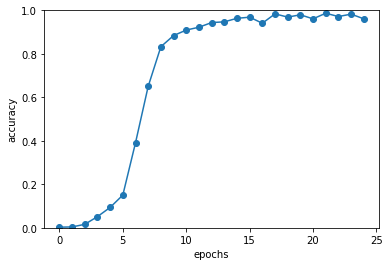

In [7]:
# データセットの読み込み
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

is_reverse = True 
if is_reverse:
    x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]

# ハイパーパラメータの設定
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)

optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_peeky_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse)

    acc = float(correct_num) / len(x_test)
    acc_peeky_list.append(acc)
    print('val acc %.3f%%' % (acc * 100))

# グラフの描画
x = np.arange(len(acc_list))
plt.plot(x, acc_peeky_list, marker='o')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.show()


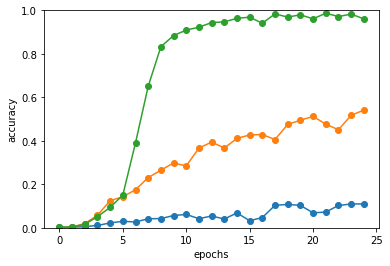

In [8]:

x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.plot(x, acc_reverse_list, marker='o')
plt.plot(x, acc_peeky_list, marker='o')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.show()

In [ ]:
}